In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# Data hyperparameters

mu_gt = 9.0
sigma_gt = 1.5
n = 100000

data = np.random.normal(loc=mu_gt, scale=sigma_gt, size=n)

data_mean = np.mean(data)

data_mean

8.993061772784413

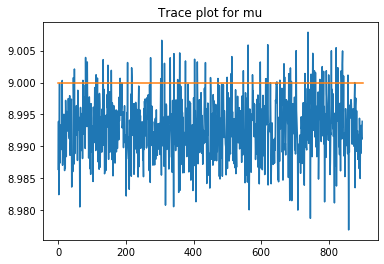

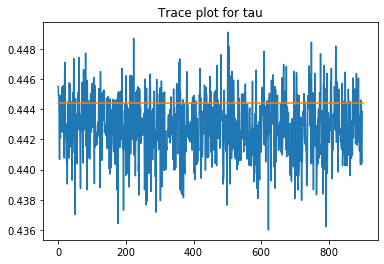

In [89]:
# Model hyperparameters
mu_0 = 0
sigma_0 = 10
alpha_0 = 0.1
beta_0 = 0.1

# MCMC hyperparameters
num_steps = 1000
burn_in = 100

# Initialize chain
mu = 0
tau = 1
mu_chain = []
tau_chain = []

# Run chain
for i in range(num_steps):
    
    # Sample mu from p(mu | tau, data)
    mu_mean = (mu_0 * sigma_0**(-2) + tau * n * data_mean) / (sigma_0**(-2) + tau * n)
    mu_var = 1 / (sigma_0**(-2) + tau * n)
    mu = np.random.normal(mu_mean, np.sqrt(mu_var))
    
    # Sample sigma from p(sigma | mu, data)
    tau_alpha = alpha_0 + 0.5 * n
    tau_beta = beta_0 + 0.5 * ((data - mu)**2).sum()
    tau = np.random.gamma(tau_alpha, 1 / tau_beta)
    
    if i > burn_in:
        mu_chain.append(mu)
        tau_chain.append(tau)
    
plt.plot(mu_chain)
plt.plot([mu_gt] * (num_steps - burn_in))
plt.title("Trace plot for mu")
plt.show()
plt.plot(tau_chain)
plt.plot([1 / (sigma_gt**2)] * (num_steps - burn_in))
plt.title("Trace plot for tau")
plt.show()

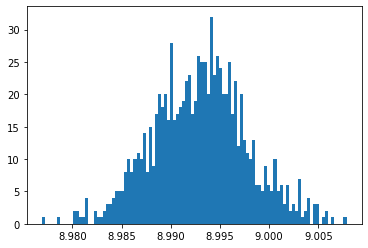

In [98]:
plt.hist(mu_chain, bins=100)
plt.show()

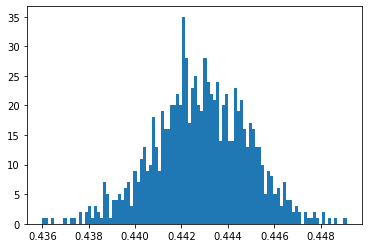

In [99]:
plt.hist(tau_chain, bins=100)
plt.show()

In [90]:
mu_est = np.mean(mu_chain)
mu_est

8.992982728106764

In [91]:
sigma_est = 1 / np.sqrt(np.mean(tau_chain))
sigma_est

1.5027250679901945

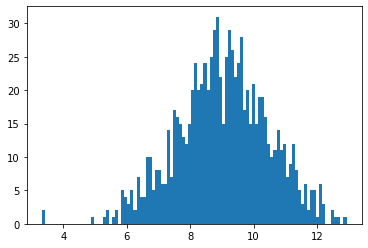

In [92]:
predictive_samples = []
for (mu, tau) in zip(mu_chain, tau_chain):
    predictive_samples.append(np.random.normal(mu, 1 / np.sqrt(np.mean(tau))))
    
plt.hist(predictive_samples, bins=100)
plt.show()